# Phosphorous Predictors in the Upper Snake-Rock Water Shed, Idaho Magic Valley
### Demetrious Lloyd
### College of IT, Western Governors University, Salt Lake City, Utah
#### Disclaimer: This is a rudimentary analysis reflecting my work as a student at Western Governors University. The publicly available data sets used in these models do not represent the research performed by any government agency.

## Introduction

### Research Question
**Research Question:** : Given the explanatory variables provided, can a logistic regression model be developed to predict when the concentration of phosphorous will exceed its maximum allowable threshold of 0.075 ppm?

---

<img src="Phosphorus_SystemModel.jpg" alt="drawing" width="1000"/><sup>1</sup>

Phosphorous is an critical nutrient in regards to sustaining life as it comprises over 9% of all RNA and DNA by weight<sup>2</sup>. For the purposes of the USDA (US Department of Agriculture), this analysis will be focused on the environmentally harmful effects of phosphorous as a fertilizer. When phosphorous is added to soil, the runoff from watering crops can cause algae to grow en masse.<sup>1</sup> The bacteria and other microorganisms that feed off of the algae create low-oxygen environments that often lead to the death of local fish and other species.<sup>1</sup>.

CEAP, the Conservation Effects Assessment Project is a project led by the U.S. Department of Agriculture (USDA) – Natural Resources Conservation Service (NCRS)<sup>3</sup>. The watershed studies performed by CEAP inspect water quality, availability, and soil concerns throughout the nation.<sup>3</sup> Though multiple study sites exist, this analysis will inspect the CEAP data located at the location: Upper Snake River and Rock Creek, Idaho. The water path locations measured by CEAP originate from the snowmelt from South Hills of Southern-Central Idaho and discharge into the Snake River, the largest local water source of the Snake River Basin. The CEAP data delivery system, STEWARDS<sup>4</sup> reveals that this location collects flow rate data, electrical conductivity (EC), total suspended solid (TSS) measurements and specific chemical concentrations (Table 1). 

**Table 1**

Measured Soil Compounds and Their Atomic Symbols

|Atom/Molecule | Atomic Symbol|
|---|---|
|Aluminum | Al|
|Calcium | Ca|
|Chloride | Cl<sup>-</sup>|
|Iron | Fe|
|Potassium | K|
|Magnesium | Mg|
|Manganese | Mn|
|Sodium | Na|
|Ammonia | NH4<sup>+</sup>|
|Nitrate | NO3<sup>-</sup>|
|Phosphorous | P|
|Sulfur | S|
|Zinc | Zn|

It should be noted that soil particles are often negatively charged<sup>5</sup>. Nitrates and phosphorous, in its negatively charged form phosphate (PO43<sup>-</sup>) are repelled by soil and are more likely to be dissolved in water.

##### **Hypothesis Testing:**

**Null Hypothesis (H<sub>0</sub>):** Flow rates, electrical conductivity, suspended solids, and ion concentrations (Table 1) statistically significantly affect phosphorous threshold levels at a 0.05 alpha level.

**Alternate Hypothesis (H<sub>A</sub>):** Flow rates, electrical conductivity, suspended solids, and ion concentrations (Table 1) do not statistically significantly affect phosphorous threshold levels at a 0.05 alpha level.


## Data Collection

The zip files "IDUSR_Basin Discharge_measurement.7z"and "IDUSR_Basin Water Quality_measurement.7z" were used to collect the data sets: "IDUSR_Basin_SmplFlowVol.csv" and "IDUSR_Basin_WaterQuality.csv". These data sets are publicly available on a server provided by the USDA at https://www.nrrig.mwa.ars.usda.gov/stewards/stewards.html. The file "IDUSR_Basin_SmplFlowVol.csv" contains the timestamps and flow rates in meters/second at designated canal sites in the Snake River Basin. Flat file, "IDUSR_Basin_WaterQuality.csv" contains the rest of the predictors mentioned below. These data sets were converted to data frames and merged on their matching fields: SiteID, Date, and SampleID. An additional field, P_threshold, was appended to the merged data frame containing the Boolean values True and False, where True represents sample records that surpass the threshold concentration of 0.075 ppm. 0.075 ppm is an upper threshold limit established by the Idaho Department of Environmental Quality<sup>6</sup> for phosphorous concentrations in the main Snake River.

IDUSR_Basin_SmplFlowVol.csv has 4 fields: “Site identifier”, “Date & time”, “Sample identifier”, and “Sample flow volume, water, cubic meters”. These fields represent the site location, timestamp of water collection, unique sample ID and water flow in m3/s respectively. IDUSR_Basin_Waterquality.csv contains 22 fields. They are expanded upon in Table 2. The first 3 fields of both data sets will be renamed to SiteID, Date, and SampleID respectively.

**Table 2**

Fields of the Flat File: IDUSR_Basin_Waterquality.csv

|Field | Example | Meaning/Unit |
| --- | -- | --- |
|Site identifier  | IDUSRA10  | Site location |
|Date/Time  | 5/30/2006 16:30 | Timestamp |
|Sample identifier  | A10.0032  | Unique Sample ID |
|Field method  | IDUSR_FM06  | Collection and/or treatment method |
|Nitrogen, total kjeldahl, water, milligrams per liter  | 0.32 | Total Nitrogen (ppm) |
|Phosphorus, total, water, milligrams per liter  | 0.11 | Total Phosphorous (ppm) |
|Aluminum, dissolved, water, milligrams per liter  | 0.02 | Aluminum (ppm) |
|Calcium, dissolved, water, milligrams per liter  | 44.93 | Calcium (ppm) |
|Chloride, dissolved, water, milligrams per liter  | 16.9 | Chloride (ppm) |
|Iron, dissolved, water, milligrams per liter  | 0.03 | Iron (ppm) |
|Potassium, dissolved, water, milligrams per liter  | 4.02 | Potassium (ppm) |
|Magnesium, dissolved, water, milligrams per liter  | 14.91 | Magnesium (ppm) |
|Manganese, dissolved, water, milligrams per liter  | 0 | Manganese (ppm) |

---
---
---

## Data Extraction and Preparation
### Install Necessary Packages

In [1]:
#!pip install pandas
#!pip install seaborn
#!pip install missingno
#!pip install xgboost
#!pip install tensorflow

### Python Packages

The necessary Python packages for data preparation, feature extraction and logistic regression are:

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

### Data Extraction

In [3]:
# The python `os` package was used to open the directory, or PC folder, on the local machine and load the csv files mentioned in the Data Collection section.

In [4]:
# change my working directory (folder)
os.chdir(r"C:\Users\raven\OneDrive - Western Governors University\D214\Task_2")
os.getcwd()

'C:\\Users\\raven\\OneDrive - Western Governors University\\D214\\Task_2'

In [5]:
file = 'IDUSR_Basin_WaterQuality.csv'
file2 = 'IDUSR_Basin_SmplFlowVol.csv'
ceap = pd.read_csv(file)
flow = pd.read_csv(file2)
ceap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 22 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Site identifier                                            6420 non-null   object 
 1   Date/Time                                                  6420 non-null   object 
 2   Sample identifier                                          6420 non-null   object 
 3   Field method                                               6420 non-null   object 
 4   Nitrogen, total kjeldahl, water, milligrams per liter      5933 non-null   float64
 5   Phosphorus, total, water, milligrams per liter             5733 non-null   float64
 6   Aluminum, dissolved, water, milligrams per liter           6387 non-null   float64
 7   Calcium, dissolved, water, milligrams per liter            6387 non-null   float64
 8   Chloride

In [6]:
ceap.head()

,Site identifier,Date/Time,Sample identifier,Field method,"Nitrogen, total kjeldahl, water, milligrams per liter","Phosphorus, total, water, milligrams per liter","Aluminum, dissolved, water, milligrams per liter","Calcium, dissolved, water, milligrams per liter","Chloride, dissolved, water, milligrams per liter","Iron, dissolved, water, milligrams per liter",...,"Manganese, dissolved, water, milligrams per liter","Sodium, dissolved, water, milligrams per liter","Ammonia, dissolved, water, milligrams per liter","Nitrate-Nitrogen, dissolved, water, milligrams per liter","Phosphorus, dissolved, water, milligrams per liter","Sulfur, dissolved, water, milligrams per liter","Zinc, dissolved, water, milligrams per liter","Specific conductivity, water, microsiemens per centimeter","pH, water, no units","Sediment, suspended, water, milligrams per liter"
0,IDUSRA10,2005-04-19 09:10:00,A10.0001,IDUSR_FM06,0.62,0.37,0.13,36.88,42.2,0.07,...,0.0,34.82,0.00,0.00,0.12,21.93,0.01,498.0,8.52,172.57
1,IDUSRA10,2005-04-28 09:50:00,A10.0002,IDUSR_FM06,0.38,0.12,0.01,33.98,38.9,0.01,...,0.0,31.23,0.00,0.00,0.03,15.79,0.05,490.0,8.22,88.42
2,IDUSRA10,2005-05-05 09:40:00,A10.0003,IDUSR_FM06,0.29,0.08,0.01,43.94,35.8,0.01,...,0.0,30.26,0.00,0.48,0.07,16.75,0.03,509.0,8.52,516.84
3,IDUSRA10,2005-05-19 09:49:00,A10.0004,IDUSR_FM06,0.34,0.07,0.02,40.41,27.6,0.01,...,0.0,24.34,0.06,0.00,0.06,14.41,0.01,447.0,8.34,60.61
4,IDUSRA10,2005-05-26 09:36:00,A10.0005,IDUSR_FM06,0.46,0.09,0.01,39.99,29.3,0.01,...,0.0,25.72,0.00,0.00,0.04,14.25,0.00,456.0,8.49,42.95


In [7]:
flow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Data columns (total 4 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Site identifier                          6181 non-null   object 
 1   Date & time                              6181 non-null   object 
 2   Sample identifier                        6181 non-null   object 
 3   Sample flow volume, water, cubic meters  6050 non-null   float64
dtypes: float64(1), object(3)
memory usage: 193.3+ KB


In [8]:
flow.head()

,Site identifier,Date & time,Sample identifier,"Sample flow volume, water, cubic meters"
0,"""IDUSRRCH""",2015-06-02 09:03:00,"""RCH.0205""",1299369.0
1,"""IDUSRRCH""",2015-06-09 08:58:00,"""RCH.0206""",657667.0
2,"""IDUSRRCH""",2015-06-16 09:15:00,"""RCH.0207""",237604.0
3,"""IDUSRRCH""",2015-06-23 08:00:00,"""RCH.0208""",6949.0
4,"""IDUSRRCH""",2015-11-10 10:25:00,"""RCH.0209""",55303.0


### Data Formatting

In [9]:
# Convert Dates to Date/Time Data
ceap['Date/Time'] = pd.to_datetime(ceap['Date/Time'])
flow['Date & time'] = pd.to_datetime(flow['Date & time'])

In [10]:
ceap['Date/Time'].head()

0   2005-04-19 09:10:00
1   2005-04-28 09:50:00
2   2005-05-05 09:40:00
3   2005-05-19 09:49:00
4   2005-05-26 09:36:00
Name: Date/Time, dtype: datetime64[ns]

In [11]:
flow['Date & time'].head()

0   2015-06-02 09:03:00
1   2015-06-09 08:58:00
2   2015-06-16 09:15:00
3   2015-06-23 08:00:00
4   2015-11-10 10:25:00
Name: Date & time, dtype: datetime64[ns]

In [12]:
# Fill NA values with zero
# Null values had no reporting
ceap.fillna(0, inplace=True)
(ceap.columns)

Index(['Site identifier', 'Date/Time', 'Sample identifier', 'Field method ',
       'Nitrogen, total kjeldahl, water, milligrams per liter',
       'Phosphorus, total, water, milligrams per liter',
       'Aluminum, dissolved, water, milligrams per liter',
       'Calcium, dissolved, water, milligrams per liter',
       'Chloride, dissolved, water, milligrams per liter',
       'Iron, dissolved, water, milligrams per liter',
       'Potassium, dissolved, water, milligrams per liter',
       'Magnesium, dissolved, water, milligrams per liter',
       'Manganese, dissolved, water, milligrams per liter',
       'Sodium, dissolved, water, milligrams per liter',
       'Ammonia, dissolved, water, milligrams per liter',
       'Nitrate-Nitrogen, dissolved, water, milligrams per liter',
       'Phosphorus, dissolved, water, milligrams per liter',
       'Sulfur, dissolved, water, milligrams per liter',
       'Zinc, dissolved, water, milligrams per liter',
       'Specific conductivity, water

In [13]:
# Fill NA values with zero
# Null values had no reporting
flow.fillna(0, inplace=True)
(flow.columns)

Index(['Site identifier', 'Date & time', 'Sample identifier',
       'Sample flow volume, water, cubic meters'],
      dtype='object')

### Ceap Formatting

In [14]:
# Create data dictionary to rename columns
ceap_dict = {'Site identifier':'SiteID', 'Date/Time':'Date', 'Sample identifier':'SampleID', 'Field method ':'Field_method', 'Nitrogen, total kjeldahl, water, milligrams per liter':'N_total_ppm', 'Phosphorus, total, water, milligrams per liter':'P_total_ppm', 'Aluminum, dissolved, water, milligrams per liter':'Al_ppm', 'Calcium, dissolved, water, milligrams per liter':'Ca_ppm', 'Chloride, dissolved, water, milligrams per liter':'Cl_ppm', 'Iron, dissolved, water, milligrams per liter':'Fe_ppm', 'Potassium, dissolved, water, milligrams per liter':'K_ppm', 'Magnesium, dissolved, water, milligrams per liter':'Mg_ppm', 'Manganese, dissolved, water, milligrams per liter':'Mn_ppm', 'Sodium, dissolved, water, milligrams per liter':'Na_ppm', 'Ammonia, dissolved, water, milligrams per liter':'NH4_ppm', 'Nitrate-Nitrogen, dissolved, water, milligrams per liter':'NO3_ppm', 'Phosphorus, dissolved, water, milligrams per liter':'P_ppm', 'Sulfur, dissolved, water, milligrams per liter':'S_ppm', 'Zinc, dissolved, water, milligrams per liter':'Zn_ppm', 'Specific conductivity, water, microsiemens per centimeter':'EC_mS_cm', 'pH, water, no units':'pH', 'Sediment, suspended, water, milligrams per liter':'TSS_ppm'}
flow_dict = {"Site identifier":"SiteID", "Date & time":"Date","Sample identifier":"SampleID", "Sample flow volume, water, cubic meters":"m3_s"}

In [15]:
ceap.rename(columns = ceap_dict, inplace = True)
ceap = ceap.reindex(columns = ['SiteID', 'Date', 'SampleID', 'Field_method', 'Al_ppm', 'Ca_ppm', 'Cl_ppm', 'Fe_ppm', 'K_ppm', 'Mg_ppm', 'Mn_ppm', 'Na_ppm', 'NH4_ppm', 'NO3_ppm', 'P_ppm', 'S_ppm', 'Zn_ppm', 'EC_mS_cm', 'pH', 'TSS_ppm', 'N_total_ppm', 'P_total_ppm'])
flow.rename(columns = flow_dict, inplace = True)

In [16]:
#Confirm Renaming
print(f"{list(ceap.columns)}")
print(f"{list(flow.columns)}")

['SiteID', 'Date', 'SampleID', 'Field_method', 'Al_ppm', 'Ca_ppm', 'Cl_ppm', 'Fe_ppm', 'K_ppm', 'Mg_ppm', 'Mn_ppm', 'Na_ppm', 'NH4_ppm', 'NO3_ppm', 'P_ppm', 'S_ppm', 'Zn_ppm', 'EC_mS_cm', 'pH', 'TSS_ppm', 'N_total_ppm', 'P_total_ppm']
['SiteID', 'Date', 'SampleID', 'm3_s']


In [17]:
flow.head()

,SiteID,Date,SampleID,m3_s
0,"""IDUSRRCH""",2015-06-02 09:03:00,"""RCH.0205""",1299369.0
1,"""IDUSRRCH""",2015-06-09 08:58:00,"""RCH.0206""",657667.0
2,"""IDUSRRCH""",2015-06-16 09:15:00,"""RCH.0207""",237604.0
3,"""IDUSRRCH""",2015-06-23 08:00:00,"""RCH.0208""",6949.0
4,"""IDUSRRCH""",2015-11-10 10:25:00,"""RCH.0209""",55303.0


In [18]:
# Remove Quotes
flow['SiteID'] = flow['SiteID'].str.replace('\"', '', regex = True)
flow['SampleID'] = flow['SampleID'].str.replace('\"', '', regex = True)

In [19]:
flow['SiteID'].head()

0    IDUSRRCH
1    IDUSRRCH
2    IDUSRRCH
3    IDUSRRCH
4    IDUSRRCH
Name: SiteID, dtype: object

In [20]:
# Replace total phosphorous with dissolved where dissolved is higher
ceap['P_total_ppm'] = np.where(ceap['P_total_ppm'] < ceap['P_ppm'], ceap['P_ppm'], ceap['P_total_ppm'])

In [21]:
# confirm No dissolved P is higher
print(ceap[ceap['P_ppm']>ceap['P_total_ppm']].shape[0])
# confirm equivalence in total dataframe and transformed column
print(ceap[ceap['P_ppm'] <= ceap['P_total_ppm']].shape[0] == ceap.shape[0])
# drop the dissolved phosphorous
ceap.drop('P_ppm', axis = 1, inplace =True)
# count total records
print(ceap.shape[0])

0
True
6420


In [22]:
ceap.head()

,SiteID,Date,SampleID,Field_method,Al_ppm,Ca_ppm,Cl_ppm,Fe_ppm,K_ppm,Mg_ppm,...,Na_ppm,NH4_ppm,NO3_ppm,S_ppm,Zn_ppm,EC_mS_cm,pH,TSS_ppm,N_total_ppm,P_total_ppm
0,IDUSRA10,2005-04-19 09:10:00,A10.0001,IDUSR_FM06,0.13,36.88,42.2,0.07,7.36,18.46,...,34.82,0.00,0.00,21.93,0.01,498.0,8.52,172.57,0.62,0.37
1,IDUSRA10,2005-04-28 09:50:00,A10.0002,IDUSR_FM06,0.01,33.98,38.9,0.01,5.70,18.44,...,31.23,0.00,0.00,15.79,0.05,490.0,8.22,88.42,0.38,0.12
2,IDUSRA10,2005-05-05 09:40:00,A10.0003,IDUSR_FM06,0.01,43.94,35.8,0.01,5.92,19.62,...,30.26,0.00,0.48,16.75,0.03,509.0,8.52,516.84,0.29,0.08
3,IDUSRA10,2005-05-19 09:49:00,A10.0004,IDUSR_FM06,0.02,40.41,27.6,0.01,5.57,17.27,...,24.34,0.06,0.00,14.41,0.01,447.0,8.34,60.61,0.34,0.07
4,IDUSRA10,2005-05-26 09:36:00,A10.0005,IDUSR_FM06,0.01,39.99,29.3,0.01,5.67,17.12,...,25.72,0.00,0.00,14.25,0.00,456.0,8.49,42.95,0.46,0.09


### Data Cleaning
#### Duplicate Check

In [23]:
# Check for duplicates across ALL records
print(ceap.duplicated().values.any() == True)
print(flow.duplicated().values.any() == True)

False
False


## Missing Values

In [24]:
# Check for null values across ALL records
print(ceap.isnull().values.any() == True)
print(flow.isnull().values.any() == True)

False
False


### Outliers

#### CEAP Site ID's

In [25]:
# Unqiue values of SiteID
print(f"Unique Site ID's: {ceap['SiteID'].unique()}")
print(f"Number of Unique Values: {ceap['SiteID'].nunique()}")

Unique Site ID's: ['IDUSRA10' 'IDUSRCD' 'IDUSRDC' 'IDUSREP' 'IDUSRIC' 'IDUSRL10P'
 'IDUSRL10S' 'IDUSRL26' 'IDUSRL3' 'IDUSRL30' 'IDUSRL39' 'IDUSRL43'
 'IDUSRL49' 'IDUSRL5A' 'IDUSRMC' 'IDUSRMLA' 'IDUSRNC' 'IDUSRPC' 'IDUSRQ2'
 'IDUSRQC' 'IDUSRRCH' 'IDUSRRCP' 'IDUSRS2' 'IDUSRSC' 'IDUSRSQ' 'IDUSRTF'
 'IDUSRTFB' 'IDUSRTN']
Number of Unique Values: 28


#### Flow Site ID's

In [26]:
print(f"Unique Site ID's: {flow['SiteID'].unique()}")
print(f"Number of Unique Values: {flow['SiteID'].nunique()}")

Unique Site ID's: ['IDUSRRCH' 'IDUSRRCP' 'IDUSRCD' 'IDUSRDC' 'IDUSRIC' 'IDUSRMC' 'IDUSRMLA'
 'IDUSRNC' 'IDUSRA10' 'IDUSREP' 'IDUSRL3' 'IDUSRL30' 'IDUSRL39' 'IDUSRS2'
 'IDUSRL10P' 'IDUSRL10S' 'IDUSRL26' 'IDUSRL43' 'IDUSRL49' 'IDUSRL5A'
 'IDUSRPC' 'IDUSRQ2' 'IDUSRQC' 'IDUSRSC' 'IDUSRSQ' 'IDUSRTF' 'IDUSRTN']
Number of Unique Values: 27


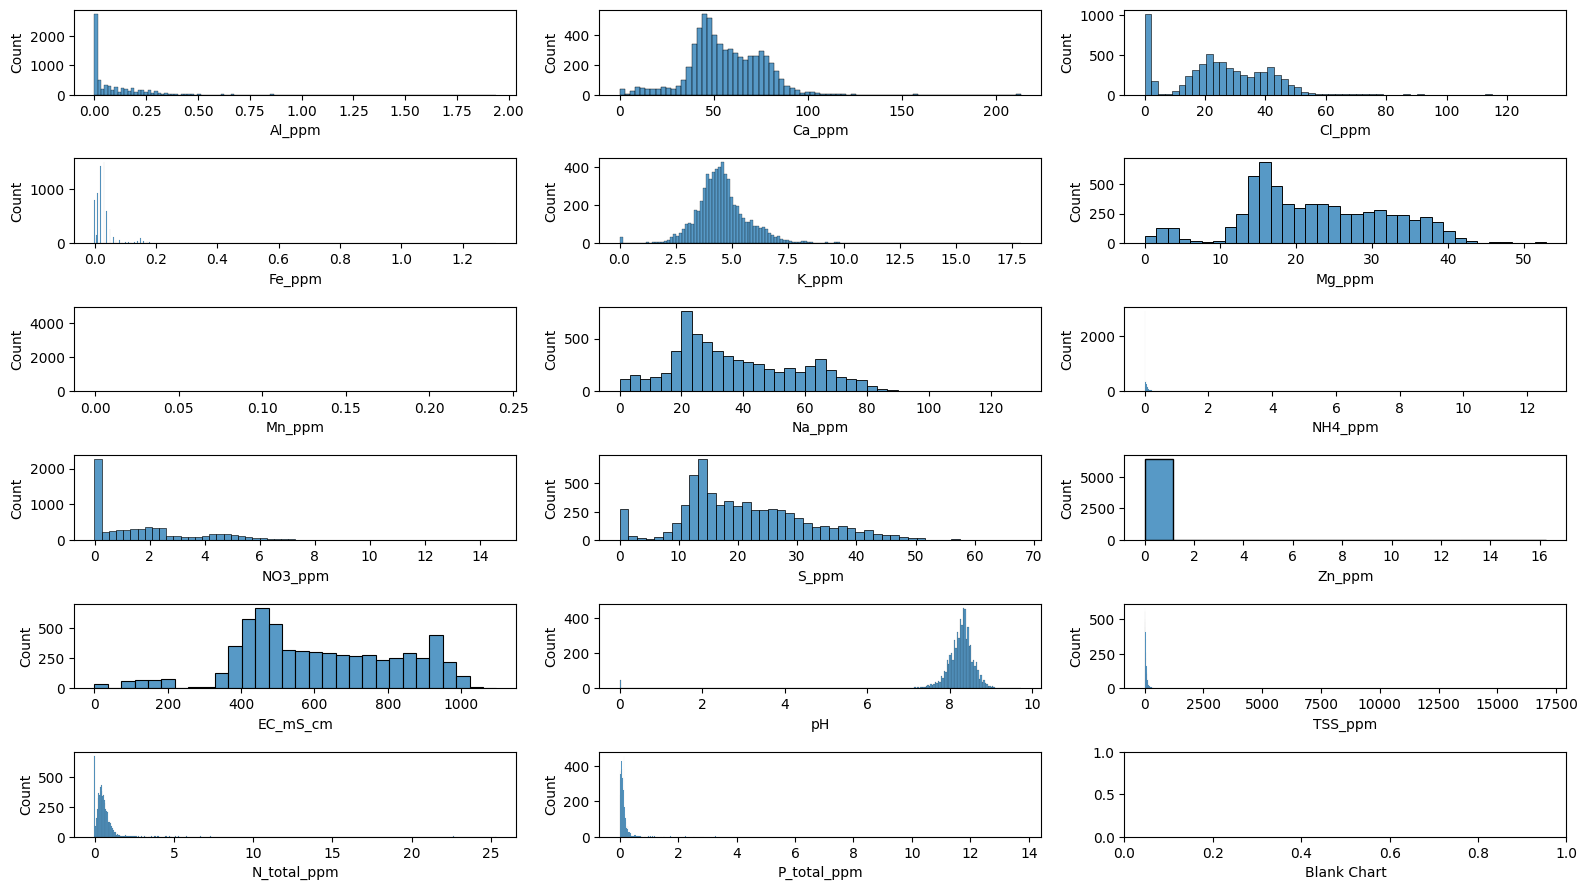

In [27]:
# histograms
fig,axs = plt.subplots(6,3, figsize= (16,9))

sns.histplot(ceap['Al_ppm'], ax =axs[0,0])
sns.histplot(ceap['Ca_ppm'], ax =axs[0,1])
sns.histplot(ceap['Cl_ppm'], ax =axs[0,2])
sns.histplot(ceap['Fe_ppm'], ax =axs[1,0])
sns.histplot(ceap['K_ppm'], ax =axs[1,1])
sns.histplot(ceap['Mg_ppm'], ax =axs[1,2])
sns.histplot(ceap['Mn_ppm'], ax =axs[2,0])
sns.histplot(ceap['Na_ppm'], ax =axs[2,1])
sns.histplot(ceap['NH4_ppm'], ax =axs[2,2])
sns.histplot(ceap['NO3_ppm'], ax =axs[3,0])
sns.histplot(ceap['S_ppm'], ax =axs[3,1])
sns.histplot(ceap['Zn_ppm'], ax =axs[3,2])
sns.histplot(ceap['EC_mS_cm'], ax =axs[4,0])
sns.histplot(ceap['pH'], ax =axs[4,1])
sns.histplot(ceap['TSS_ppm'], ax =axs[4,2])
sns.histplot(ceap['N_total_ppm'], ax =axs[5,0])
sns.histplot(ceap['P_total_ppm'], ax =axs[5,1])


axs[0,0].set_xlabel('Al_ppm')
axs[0,1].set_xlabel('Ca_ppm')
axs[0,2].set_xlabel('Cl_ppm')
axs[1,0].set_xlabel('Fe_ppm')
axs[1,1].set_xlabel('K_ppm')
axs[1,2].set_xlabel('Mg_ppm')
axs[2,0].set_xlabel('Mn_ppm')
axs[2,1].set_xlabel('Na_ppm')
axs[2,2].set_xlabel('NH4_ppm')
axs[3,0].set_xlabel('NO3_ppm')
axs[3,1].set_xlabel('S_ppm')
axs[3,2].set_xlabel('Zn_ppm')
axs[4,0].set_xlabel('EC_mS_cm')
axs[4,1].set_xlabel('pH')
axs[4,2].set_xlabel('TSS_ppm')
axs[5,0].set_xlabel('N_total_ppm')
axs[5,1].set_xlabel('P_total_ppm')
axs[5,2].set_xlabel('Blank Chart')

fig.tight_layout()


<Axes: xlabel='m3_s', ylabel='Count'>

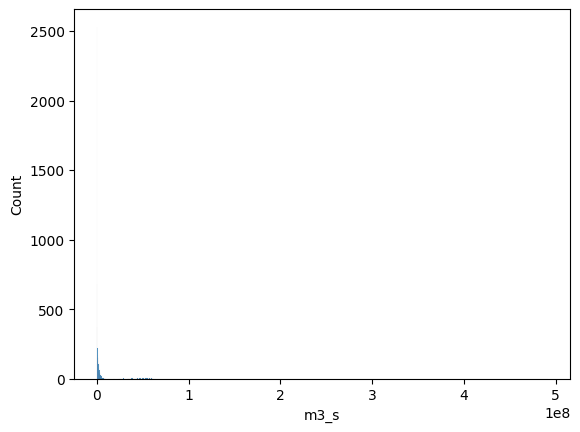

In [28]:
sns.histplot(flow['m3_s'])

In [29]:
#Record Counts
print(f"CEAP rows:\n {ceap.shape[0]}")
print(f"CEAP flow_rate rows:\n {flow.shape[0]}")

CEAP rows:
 6420
CEAP flow_rate rows:
 6181


### Merge Flows and Water Quality

In [30]:
#flow.join(ceap, on = ['SiteID']).shape[0]
flow.info()
ceap.info()

grouper = pd.merge(flow, ceap, on = ['SiteID', 'Date', 'SampleID'], how = 'inner')
grouper.shape[0]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6181 entries, 0 to 6180
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   SiteID    6181 non-null   object        
 1   Date      6181 non-null   datetime64[ns]
 2   SampleID  6181 non-null   object        
 3   m3_s      6181 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 193.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6420 entries, 0 to 6419
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SiteID        6420 non-null   object        
 1   Date          6420 non-null   datetime64[ns]
 2   SampleID      6420 non-null   object        
 3   Field_method  6420 non-null   object        
 4   Al_ppm        6420 non-null   float64       
 5   Ca_ppm        6420 non-null   float64       
 6   Cl_ppm        6420 non-null   flo

5893

In [31]:
# Check for NULL Values
print(grouper.isnull().values.any() == True)
# Check for Duplicate Values
print(grouper.duplicated().values.any() == True)
print(grouper.info())

False
False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SiteID        5893 non-null   object        
 1   Date          5893 non-null   datetime64[ns]
 2   SampleID      5893 non-null   object        
 3   m3_s          5893 non-null   float64       
 4   Field_method  5893 non-null   object        
 5   Al_ppm        5893 non-null   float64       
 6   Ca_ppm        5893 non-null   float64       
 7   Cl_ppm        5893 non-null   float64       
 8   Fe_ppm        5893 non-null   float64       
 9   K_ppm         5893 non-null   float64       
 10  Mg_ppm        5893 non-null   float64       
 11  Mn_ppm        5893 non-null   float64       
 12  Na_ppm        5893 non-null   float64       
 13  NH4_ppm       5893 non-null   float64       
 14  NO3_ppm       5893 non-null   float64       
 15  S_ppm         5893 non-nul

In [32]:
grouper = grouper.sort_values(by = ['SiteID', 'Date'])
# Unique Values
grouper.nunique()

SiteID            27
Date            5447
SampleID        5893
m3_s            5471
Field_method       3
Al_ppm           264
Ca_ppm          3797
Cl_ppm           776
Fe_ppm           311
K_ppm            620
Mg_ppm          2711
Mn_ppm           642
Na_ppm          3805
NH4_ppm          175
NO3_ppm          698
S_ppm           2785
Zn_ppm            98
EC_mS_cm        1370
pH               207
TSS_ppm         2716
N_total_ppm      235
P_total_ppm      110
dtype: int64

# Linear Regression Before Transformation

In [33]:
X = grouper.drop(['P_total_ppm', 'SiteID', 'Date', 'Field_method', 'SampleID'], axis = 1)
y = grouper['P_total_ppm']
# Normalize X

X = (X-X.mean())/X.std()

X.describe()

,m3_s,Al_ppm,Ca_ppm,Cl_ppm,Fe_ppm,K_ppm,Mg_ppm,Mn_ppm,Na_ppm,NH4_ppm,NO3_ppm,S_ppm,Zn_ppm,EC_mS_cm,pH,TSS_ppm,N_total_ppm
count,5893.000000,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03,5893.000000,5.893000e+03,5.893000e+03,5.893000e+03,5.893000e+03
mean,0.000000,-8.681330e-17,-3.665450e-16,-2.315021e-16,-3.858369e-17,-9.645922e-18,-9.645922e-17,2.411481e-17,-1.398659e-16,-4.822961e-18,-1.929184e-17,-1.109281e-16,0.000000,4.822961e-16,-2.797317e-16,-3.858369e-17,2.652629e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-0.275076,-6.559288e-01,-3.033255e+00,-1.605132e+00,-5.887594e-01,-3.802819e+00,-2.420443e+00,-3.911652e-01,-1.882980e+00,-3.607918e-01,-9.541845e-01,-2.049715e+00,-0.028560,-2.845832e+00,-1.090602e+01,-2.795500e-01,-9.948817e-01
25%,-0.270163,-6.559288e-01,-6.382786e-01,-5.663507e-01,-4.162538e-01,-5.678852e-01,-7.244802e-01,-2.897415e-01,-7.769299e-01,-3.308907e-01,-9.245328e-01,-7.193927e-01,-0.026299,-7.479521e-01,-1.409952e-01,-2.057627e-01,-4.992247e-01
50%,-0.253892,-4.455566e-01,-1.037241e-01,-1.489894e-02,-2.480706e-01,-9.749938e-02,-1.051498e-01,-2.897415e-01,-2.246460e-01,-2.039221e-01,-2.305673e-01,-1.714985e-01,-0.026299,-1.167627e-01,1.112063e-01,-1.270689e-01,-1.334261e-01
75%,-0.163072,3.959324e-01,7.463848e-01,7.738054e-01,-7.988736e-02,4.554102e-01,7.913335e-01,-2.586135e-01,7.939671e-01,1.134993e-01,4.522947e-01,6.119025e-01,-0.026299,8.605391e-01,3.103128e-01,2.441560e-02,3.421120e-01
max,35.601992,1.294814e+01,8.480973e+00,6.923134e+00,2.144757e+01,1.098545e+01,3.229214e+00,4.918520e+01,4.531022e+00,5.902692e+01,7.153225e+00,4.247662e+00,76.290079,2.206634e+00,1.863343e+00,6.518506e+01,4.533534e+01


## Statistical Model Significance

In [34]:
import statsmodels.api as sm

# SM.OLS = linear
# Assume X is your matrix of independent variables and Y is your vector of dependent variable
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            P_total_ppm   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     2559.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:35:56   Log-Likelihood:                 6500.5
No. Observations:                5893   AIC:                        -1.296e+04
Df Residuals:                    5875   BIC:                        -1.284e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1289      0.001    123.051      

## Cross Validation Accuracy

In [35]:
linreg = LinearRegression()
cv_results = cross_val_score(linreg, X, y, cv = 60)
print(f'Mean of Cross Validation Scores: \n{np.mean(cv_results)}\n')

Mean of Cross Validation Scores: 
0.09447248963999098



## Hold-Out Testing Accuracy

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

linreg.fit(X_train, y_train)

print(f'Hold-Out Testing Score: \n{linreg.score(X_test, y_test)}')

Hold-Out Testing Score: 
0.7515177854488924


In [37]:
# Linear Regression coefficients
pd.concat([pd.DataFrame(linreg.feature_names_in_), pd.DataFrame(linreg.coef_)], axis = 1)

,0,0
0,const,0.000000
1,m3_s,-0.004874
2,Al_ppm,0.014094
3,Ca_ppm,0.003280
4,Cl_ppm,-0.003037
5,Fe_ppm,-0.014218
6,K_ppm,0.019257
7,Mg_ppm,-0.010028
8,Mn_ppm,0.002526
9,Na_ppm,-0.006799


In [38]:
# Logistic Regression Intercept
linreg.intercept_

0.12776277657485083

# Linear Regression - No_ions

In [39]:
X_no_ions = X[['m3_s', 'EC_mS_cm', 'pH', 'TSS_ppm']]
X_train, X_test, y_train, y_test = train_test_split(X_no_ions, y, test_size = 0.3, random_state=42)

## Statistical Model Significance

In [40]:
import statsmodels.api as sm

# SM.OLS = linear
# Assume X is your matrix of independent variables and Y is your vector of dependent variable
X_no_ions = sm.add_constant(X_no_ions) # adding a constant
model = sm.OLS(y, X_no_ions).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            P_total_ppm   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     7361.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:35:56   Log-Likelihood:                 5507.3
No. Observations:                5893   AIC:                        -1.100e+04
Df Residuals:                    5888   BIC:                        -1.097e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1289      0.001    104.081      0.0

## Cross Validation Accuracy

In [41]:
linreg = LinearRegression()
cv_results = cross_val_score(linreg, X_no_ions, y, cv = 60)
print(f'Mean of Cross Validation Scores: \n{np.mean(cv_results)}\n')

Mean of Cross Validation Scores: 
0.10341921739090455



## Hold Out Testing Accuracy

In [42]:
linreg.fit(X_train, y_train)

print(f'Hold-Out Testing Score: \n{linreg.score(X_test, y_test)}')

Hold-Out Testing Score: 
0.6637654029434776


In [43]:
# Coefficients
pd.concat([pd.DataFrame(linreg.feature_names_in_), pd.DataFrame(linreg.coef_)], axis = 1)

,0,0
0,m3_s,-0.007097
1,EC_mS_cm,0.001916
2,pH,0.001282
3,TSS_ppm,0.211147


In [44]:
# Linear Regression Intercept
linreg.intercept_

0.12744270350207074

In [45]:
grouper.to_excel('ceap_public.xlsx', index = False)
grouper.to_csv('ceap_public.csv', index = False)

### Regression - linear on quantitative vars and P_total_ppm

In [46]:
from scipy.stats import spearmanr
quant_vars = ['m3_s', 'Al_ppm','Ca_ppm', 'Cl_ppm', 'Fe_ppm', 'K_ppm', 'Mg_ppm', 'Mn_ppm', 'Na_ppm', 'NH4_ppm', 'NO3_ppm', 'S_ppm', 'Zn_ppm', 'EC_mS_cm', 'pH', 'TSS_ppm','N_total_ppm']

for var in quant_vars:
    corr, _ = spearmanr(grouper[[var]], grouper['P_total_ppm'])
    R_square = corr**2
    print('R^2 with respect to total Phosphorous {}:\n{} {}'.format(var, R_square,'''\n'''))

R^2 with respect to total Phosphorous m3_s:
0.02086064272687907 

R^2 with respect to total Phosphorous Al_ppm:
0.030775387851836734 

R^2 with respect to total Phosphorous Ca_ppm:
0.004632224721595728 

R^2 with respect to total Phosphorous Cl_ppm:
0.019072936702025062 

R^2 with respect to total Phosphorous Fe_ppm:
0.00910923935713895 

R^2 with respect to total Phosphorous K_ppm:
0.02369607289311791 

R^2 with respect to total Phosphorous Mg_ppm:
0.006739417805612133 

R^2 with respect to total Phosphorous Mn_ppm:
0.0009991252762384358 

R^2 with respect to total Phosphorous Na_ppm:
0.005274455077168558 

R^2 with respect to total Phosphorous NH4_ppm:
5.300092903785686e-05 

R^2 with respect to total Phosphorous NO3_ppm:
0.022653170923636824 

R^2 with respect to total Phosphorous S_ppm:
0.011202215340463664 

R^2 with respect to total Phosphorous Zn_ppm:
0.001265640495227383 

R^2 with respect to total Phosphorous EC_mS_cm:
0.0064996697794633155 

R^2 with respect to total Phosphor

---
---
---

## Statistically significant vars

In [51]:
X_sig = grouper.drop(['P_total_ppm', 'SiteID', 'Date', 'Field_method', 'SampleID', 'Ca_ppm', 'pH', 'Zn_ppm', 'Mn_ppm'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_sig, y, test_size = 0.3, random_state=42)
# List statistically significant vars
list(X_sig.columns)

['m3_s',
 'Al_ppm',
 'Cl_ppm',
 'Fe_ppm',
 'K_ppm',
 'Mg_ppm',
 'Na_ppm',
 'NH4_ppm',
 'NO3_ppm',
 'S_ppm',
 'EC_mS_cm',
 'TSS_ppm',
 'N_total_ppm']

In [48]:
# Assume X is your matrix of independent variables and Y is your vector of dependent variable
X_sig = sm.add_constant(X_sig) # adding a constant
model = sm.OLS(y, X_sig).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            P_total_ppm   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     3348.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:36:00   Log-Likelihood:                 6499.1
No. Observations:                5893   AIC:                        -1.297e+04
Df Residuals:                    5879   BIC:                        -1.288e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0397      0.006     -6.682      

## Hold Out Testing

In [52]:
linreg.fit(X_train, y_train)

print(f'Hold-Out Testing Score: \n{linreg.score(X_test, y_test)}')

Hold-Out Testing Score: 
0.7534440753823484


## Cross Validation Accuracy

In [53]:
cv_results = cross_val_score(linreg, X_sig, y, cv = 60)
print(f'Mean of Cross Validation Scores: \n{np.mean(cv_results)}\n')

Mean of Cross Validation Scores: 
0.15586481835628754



In [49]:
predicted_outcomes = np.round(model.predict())
accuracy = np.mean(predicted_outcomes == True)
accuracy

0.010351264211776684

## Data Summary and Implications
Multiple linear regression provides frequently accurate predictions for the data sets provided. The model has poor predictability in a general use case. 
### Original Model
  - R<sup>2</sup> = 0.881
  - Hold-Out Testing Accuracy: 0.75
  - 60-Fold Cross Validation Accuracy: 0.09
### Lean Model 
  - R<sup>2</sup> = 0.883
  - Hold-Out Testing Accuracy: 0.66
  - 60-Fold Cross Validation Accuracy: 0.10
  - **Limited Variables**: m3_s, EC_mS_cm, pH, TSS_ppm
### Statistically Significant Variables: Model
  - R<sup>2</sup> = 0.881
  - Hold-Out Testing Accuracy: 0.75
  - 60-Fold Cross Validation Accuracy: 0.16